# Latar Belakang
Sebuah perusahaan yang bergerak di bidang data, ingin merekrut *data scientist*. Perusahaan ini melakukan pelatihan dan melakukan perekrutan ke orang-orang yang berhasil menyelesaikan pelatihan tersebut. Banyak orang mendaftar ke pelatihan tersebut, tapi tidak semua yang ikut pelatihan berniat untuk pindah pekerjaan.   


## Pernyataan Masalah
Perusahaan ingin mengetahui **kandidat mana saja yang ingin bekerja di perusahaan mereka setelah training atau sedang mencari pekerjaan baru**. Informasi ini akan membantu perusahaan untuk mengurangi ongkos dan waktu training, meningkatkan kualitas dan membantu dalam mengelompokkan kandidat dalam training. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik kandidat yang ingin pindah pekerjaan, terutama dibandingkan peserta yang tidak ingin pindah bekerja?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

This dataset contains transaction data from a fictitious SaaS company selling sales and marketing
software to other companies (B2B). In the dataset, each row represents a product in a transaction,
and the columns include:

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

In [60]:
# Load the dataset
df = pd.read_csv('SaaS-Sales.csv')
# Explore the dataset
display(df.head(),df.tail())
print(df.info())
print(df.describe())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [51]:
print(df.isnull().sum())
print(df.describe())
df.dropna(inplace=True)

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
            Row ID      Date Key  Customer ID         Sales     Quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  110

## Distribusi Numerik

<Figure size 1200x800 with 0 Axes>

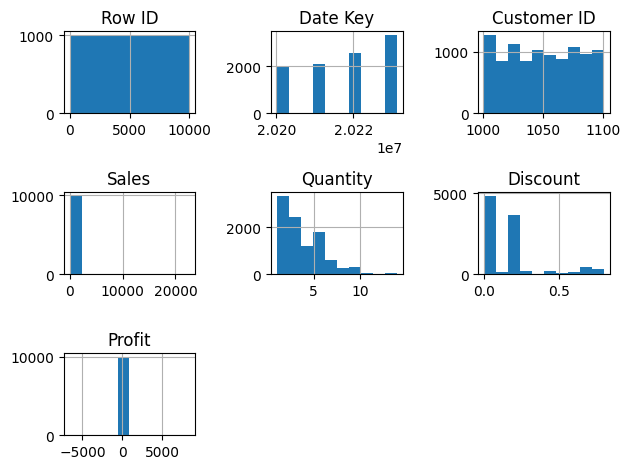

In [34]:
plt.figure(figsize=(12, 8))
df.hist()
plt.tight_layout()
plt.show()

## Distribusi Kategori

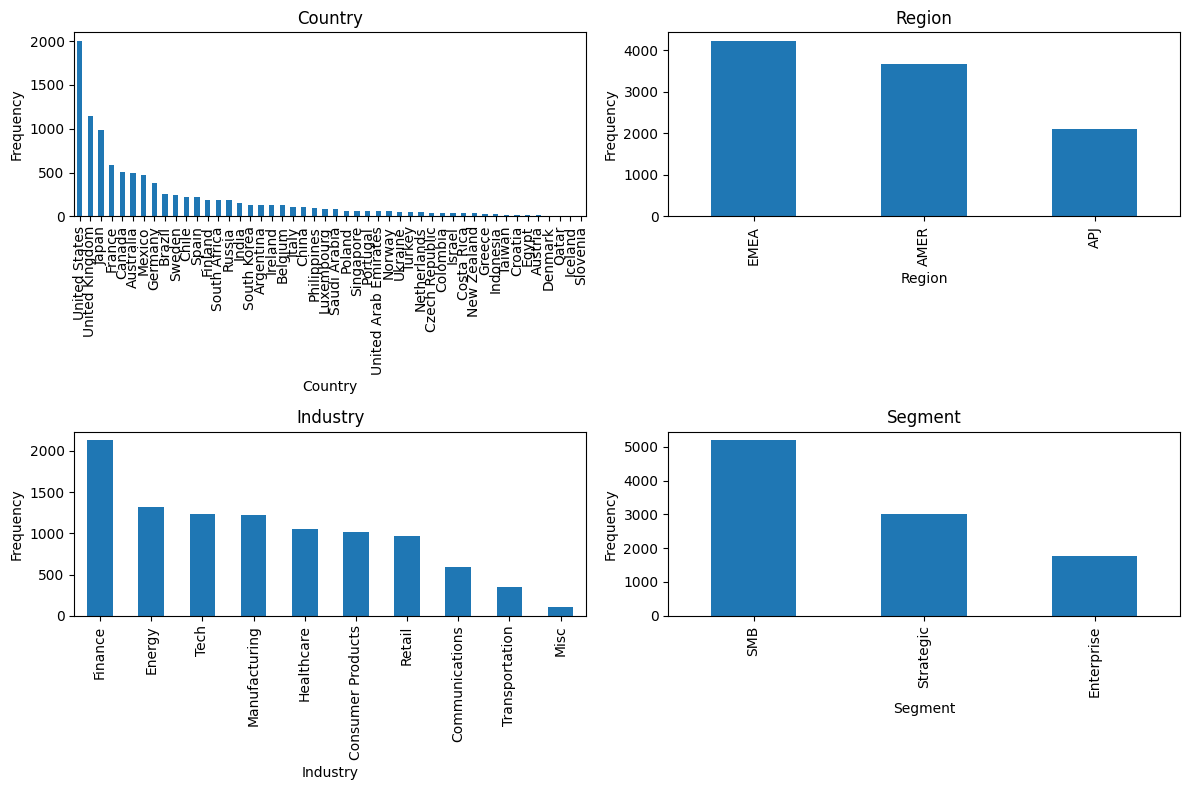

In [35]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Country', 'Region', 'Industry', 'Segment'], start=1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

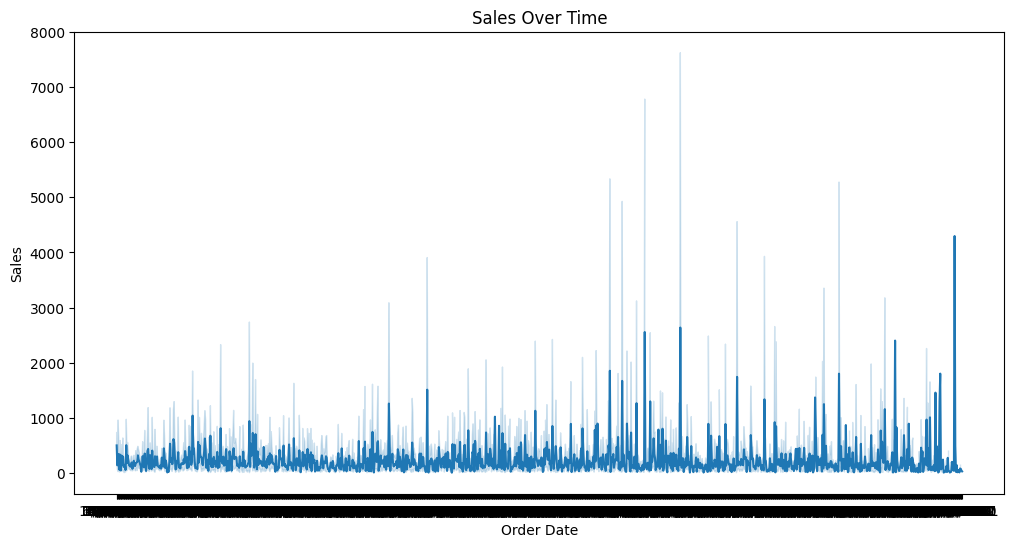

In [52]:
# Visualize sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Order Date', y='Sales')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

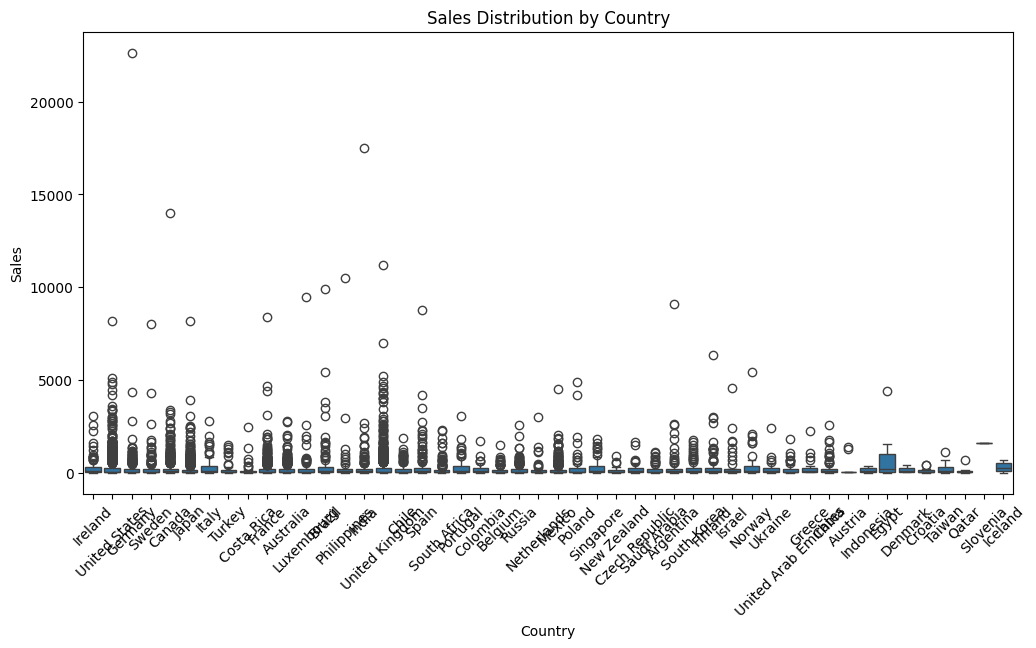

In [53]:
# Visualize sales distribution by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Sales')
plt.title('Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


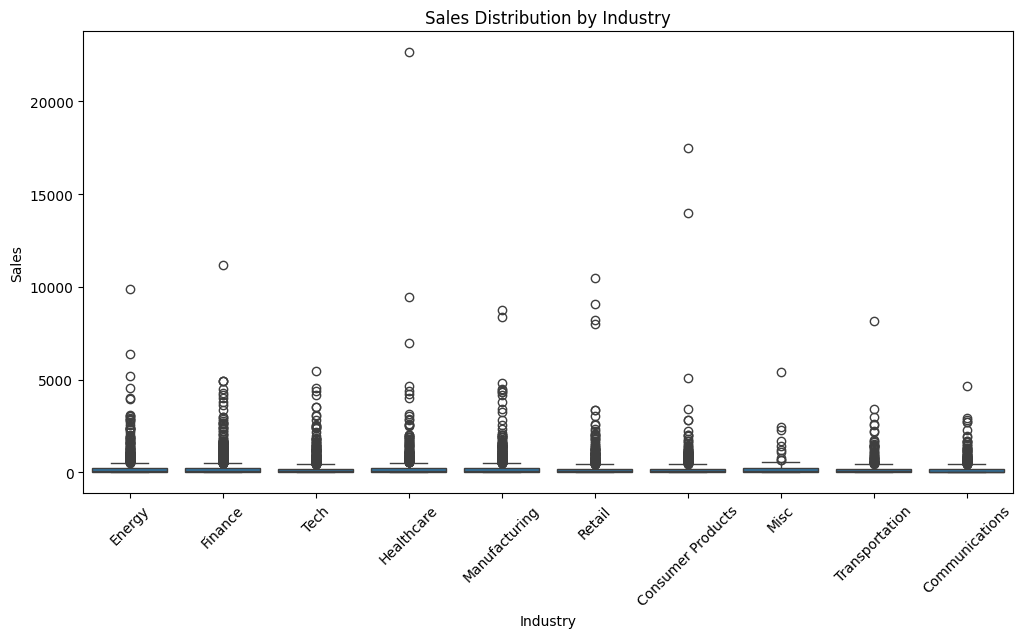

In [54]:
# Visualize sales distribution by industry
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Industry', y='Sales')
plt.title('Sales Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

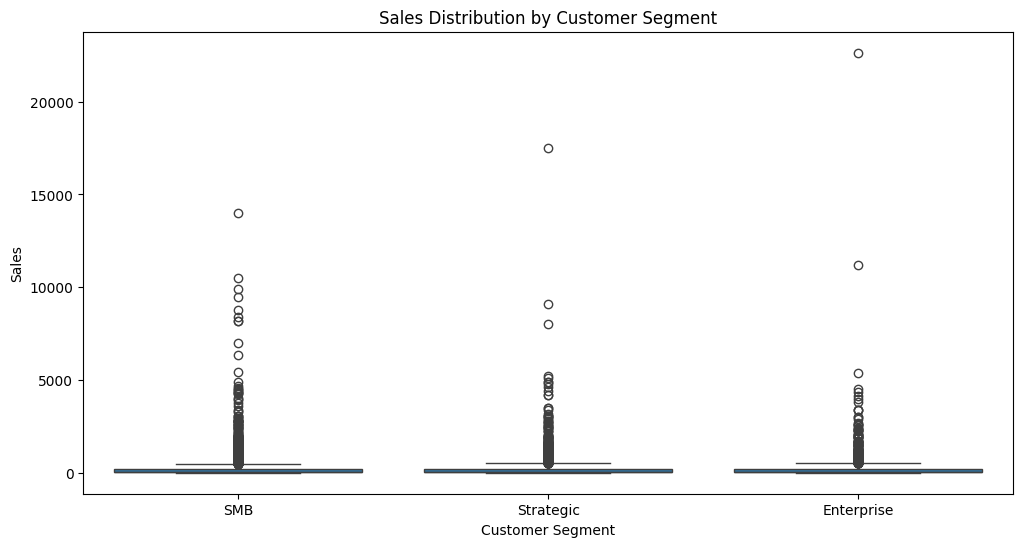

In [55]:
# Visualize sales distribution by customer segment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Segment', y='Sales')
plt.title('Sales Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

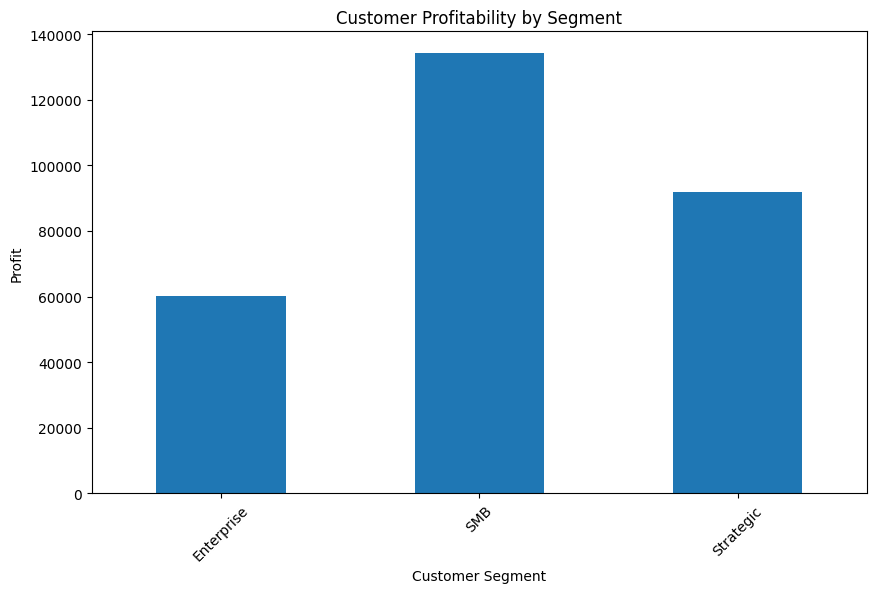

In [57]:
# Calculate profitability by customer segment
customer_profitability = df.groupby('Segment')['Profit'].sum()

# Visualize profitability by customer segment
plt.figure(figsize=(10, 6))
customer_profitability.plot(kind='bar')
plt.title('Customer Profitability by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

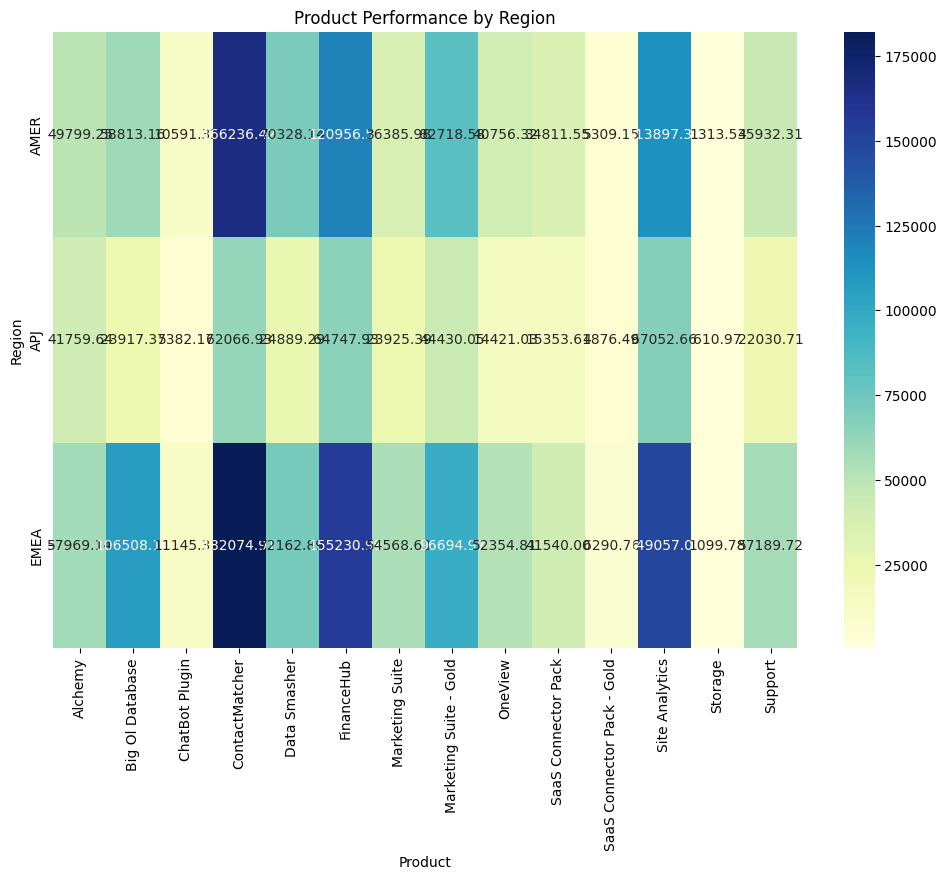

In [58]:
# Analyze sales performance by product category and region
product_performance = df.groupby(['Region', 'Product'])['Sales'].sum().unstack()

# Visualize product performance by region
plt.figure(figsize=(12, 8))
sns.heatmap(product_performance, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Product Performance by Region')
plt.xlabel('Product')
plt.ylabel('Region')
plt.show()

## Sales Trend

          Recency   Frequency      Monetary
count   99.000000   99.000000     99.000000
mean    19.343434  100.949495  23204.049094
std     30.589835   35.479334  10006.663857
min      0.000000   22.000000   5402.902000
25%      4.500000   73.500000  15692.639000
50%      9.000000  100.000000  22650.820600
75%     22.000000  124.500000  29486.288500
max    239.000000  192.000000  55719.210000


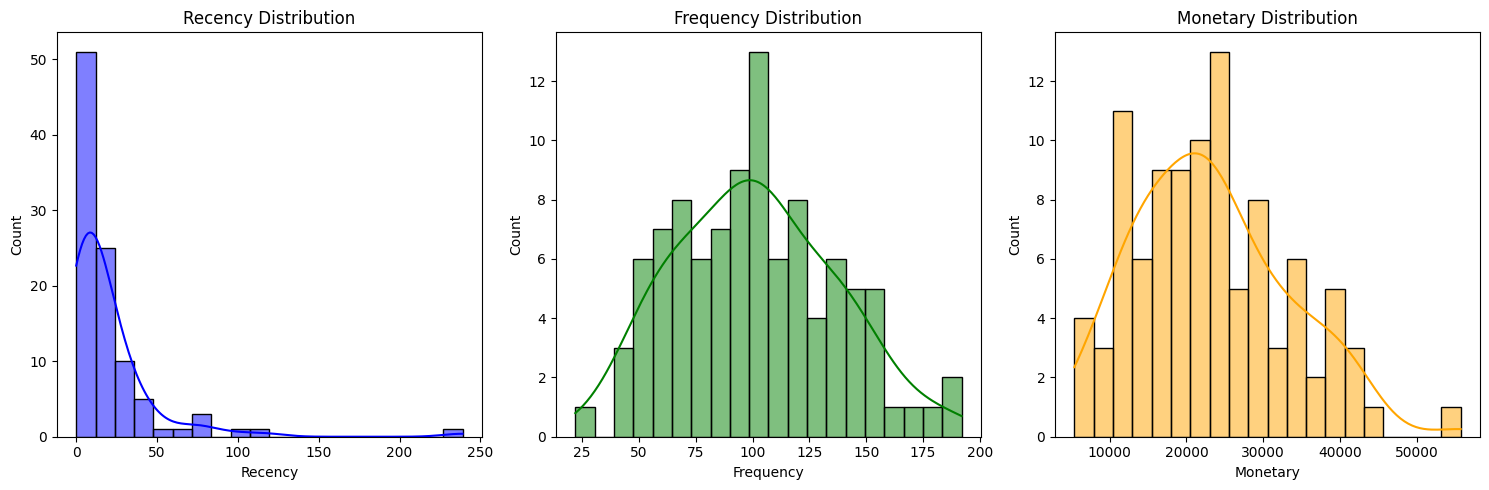

In [65]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate RFM metrics
rfm_data = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (df['Order Date'].max() - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
})

# Rename the columns
rfm_data.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

# Print the summary statistics
print(rfm_data.describe())

# Visualize RFM distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_data['Recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_data['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_data['Monetary'], bins=20, kde=True, color='orange')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


1. Distribusi Recency: Histogram menunjukkan distribusi jumlah hari sejak pembelian terakhir (recency) untuk setiap pelanggan. Konsentrasi pelanggan dengan nilai recency yang lebih rendah menunjukkan bahwa banyak pelanggan telah melakukan pembelian baru-baru ini, sementara ekor menuju nilai recency yang lebih tinggi menunjukkan bahwa beberapa pelanggan belum melakukan pembelian dalam waktu yang lama.

2. Distribusi Frequency: Histogram menggambarkan distribusi jumlah pesanan (frequency) yang ditempatkan oleh setiap pelanggan. Frekuensi yang lebih tinggi menunjukkan pelanggan yang lebih setia yang melakukan pembelian secara teratur, sementara frekuensi yang lebih rendah menunjukkan pembeli sesekali. 

3. Distribusi Moneter: Histogram menampilkan distribusi nilai moneter total pembelian yang dilakukan oleh setiap pelanggan. Nilai moneter yang lebih tinggi menunjukkan pelanggan yang menghabiskan lebih banyak untuk pembelian mereka, sementara nilai moneter yang lebih rendah menunjukkan pelanggan yang melakukan transaksi kecil.